1. Exploratory Data Analysis (EDA): We'll start by loading the data and understanding its structure, checking for missing values, outliers, and understanding the distribution of the data.

2. Data Preprocessing: We'll handle missing values, encode categorical variables if necessary, scale the data, and possibly perform feature selection or extraction.

3. Visualization: We'll create visualizations to understand relationships between features and the target variable, which in this case is likely the amount of solar power generated.

4. Modeling: We will train an SVR model, tune its parameters, and validate its performance.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
file_path = 'data.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe
data.head()

,Time (hrs),Mean Module Temperature (deg ˚C),Mean Open Air Temperature,Global horizontal irradiance (GHI) (W/m2),Tilt solar incident radiation (w/m2),Diffuse Horizontal incident radiation (DHI),Power Generation (kW),Precipitation (mm)
0,2013-01-01 01:00:00,22.10,24.00,0.0,0.0,0.0,0.5,0.0
1,2013-01-01 02:00:00,22.15,24.20,0.0,0.0,0.0,0.0,0.0
2,2013-01-01 03:00:00,22.45,24.50,0.0,0.0,0.0,0.5,0.0
3,2013-01-01 04:00:00,22.84,24.50,0.0,0.0,0.0,0.5,0.5
4,2013-01-01 05:00:00,21.98,23.65,0.0,0.0,0.0,0.0,0.0


The dataset contains the following columns:

- `Time (hrs)`: The hourly timestamp for the data points.
- `Mean Module Temperature (deg ˚C)`: The average temperature of the solar module.
- `Mean Open Air Temperature`: The average ambient air temperature.
- `Global horizontal irradiance (GHI) (W/m²)`: The total amount of shortwave radiation received from above by a surface horizontal to the ground.
- `Tilt solar incident radiation (w/m²)`: The solar radiation incident on a tilted surface.
- `Diffuse Horizontal incident radiation (DHI)`: The portion of GHI that is scattered in the atmosphere and arrives at the ground from all directions.
- `Power Generation (kW)`: The amount of power generated by the solar modules.
- `Precipitation (mm)`: The recorded precipitation.

# EDA

In [3]:
# Summary statistics for the dataset
summary_statistics = data.describe()

# Checking for missing values
missing_values = data.isnull().sum()

summary_statistics

,Time (hrs),Mean Module Temperature (deg ˚C),Mean Open Air Temperature,Global horizontal irradiance (GHI) (W/m2),Tilt solar incident radiation (w/m2),Diffuse Horizontal incident radiation (DHI),Power Generation (kW),Precipitation (mm)
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8737.000000
mean,2013-07-02 12:29:59.999089920,30.945249,27.072554,233.054858,226.980873,107.978704,118.007249,0.146274
min,2013-01-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013-04-02 06:45:00,22.600000,24.700000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2013-07-02 12:29:59.999000064,24.500000,26.200000,2.777778,5.555556,2.777778,2.500000,0.000000
75%,2013-10-01 18:14:59.999000064,39.125000,29.450000,463.888889,463.888889,197.222222,254.125000,0.000000
max,2013-12-31 23:59:59.998000,66.900000,35.550000,1116.666667,1038.888889,668.000000,579.500000,42.500000
std,NaN,11.166646,3.002124,321.942511,305.879862,146.113651,155.819096,1.380963


The summary statistics provide the following insights:

- The `Mean Module Temperature` ranges from 0 to 66.9°C, with an average of approximately 30.95°C.
- The `Mean Open Air Temperature` ranges from 0 to 35.55°C, with an average of approximately 27.07°C.
- `Global horizontal irradiance (GHI)` has a wide range of values, from 0 to 1116.67 W/m², indicating times of no sunlight (e.g., nighttime) and peak sunlight.
- `Tilt solar incident radiation` also varies significantly, which is expected as it depends on the time of the day and weather conditions.
- `Power Generation` varies from 0 to 579.5 kW, and we can infer that there might be a strong relationship between irradiance and power generation since they both have values of 0 at times (likely during nighttime).
- There are some missing values in the `Precipitation` column, with 23 missing entries.

In [4]:
missing_values

Time (hrs)                                       0
Mean Module Temperature (deg ˚C)                 0
Mean Open Air Temperature                        0
Global horizontal irradiance (GHI) (W/m2)        0
Tilt solar incident radiation (w/m2)             0
Diffuse Horizontal incident radiation  (DHI)     0
Power Generation (kW)                            0
Precipitation (mm)                              23
dtype: int64

In [5]:
# Fill missing values in 'Precipitation (mm)' with the median value of the column
data['Precipitation (mm)'].fillna(data['Precipitation (mm)'].median(), inplace=True)

# Verify if there are any missing values left
missing_values_after_filling = data.isnull().sum()
missing_values_after_filling

Time (hrs)                                      0
Mean Module Temperature (deg ˚C)                0
Mean Open Air Temperature                       0
Global horizontal irradiance (GHI) (W/m2)       0
Tilt solar incident radiation (w/m2)            0
Diffuse Horizontal incident radiation  (DHI)    0
Power Generation (kW)                           0
Precipitation (mm)                              0
dtype: int64

Let's create the following visualizations:

1. A time series plot of Power Generation over time to see the trend and seasonality.
2. Scatter plots of Power Generation against GHI, DHI, and module temperature to observe their relationships.
3. A correlation matrix heatmap to see the interdependencies between all numerical features.

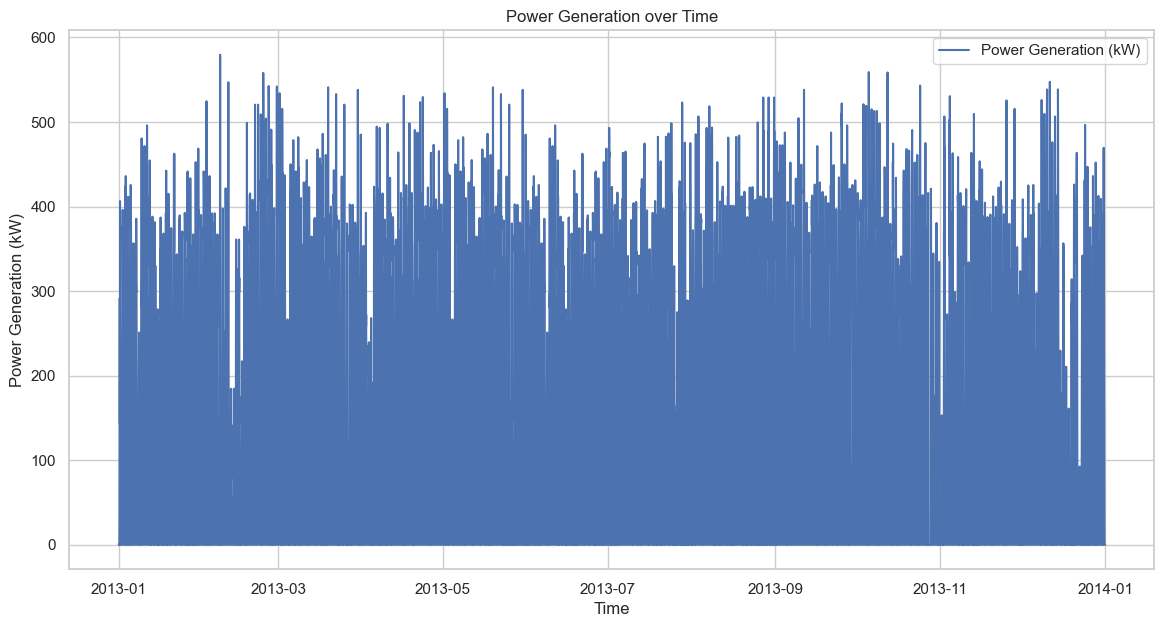

In [6]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Time series plot of Power Generation over time
plt.figure(figsize=(14, 7))
plt.plot(data['Time (hrs)'], data['Power Generation (kW)'], label='Power Generation (kW)')
plt.title('Power Generation over Time')
plt.xlabel('Time')
plt.ylabel('Power Generation (kW)')
plt.legend()
plt.show()

The time series plot of Power Generation shows fluctuations that likely correspond to the day-night cycle and possibly seasonal variations, with peaks representing the daytime when solar generation is possible.

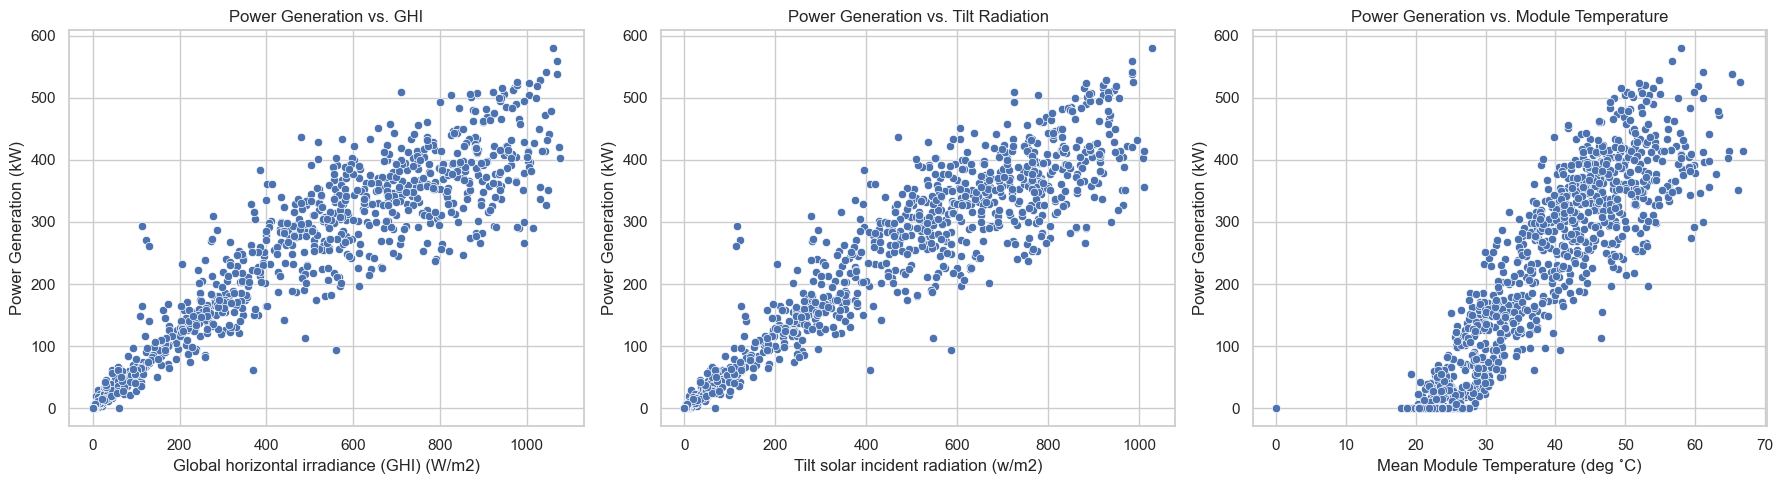

In [7]:
# Sample data for scatter plots to make the trends clearer
sampled_data = data.sample(n=2000, random_state=1)

# Scatter plots
plt.figure(figsize=(18, 5))

# Power Generation vs. Global horizontal irradiance (GHI)
plt.subplot(1, 3, 1)
sns.scatterplot(x=sampled_data['Global horizontal irradiance (GHI) (W/m2)'], 
                y=sampled_data['Power Generation (kW)'])
plt.title('Power Generation vs. GHI')

# Power Generation vs. Tilt solar incident radiation
plt.subplot(1, 3, 2)
sns.scatterplot(x=sampled_data['Tilt solar incident radiation (w/m2)'], 
                y=sampled_data['Power Generation (kW)'])
plt.title('Power Generation vs. Tilt Radiation')

# Power Generation vs. Mean Module Temperature
plt.subplot(1, 3, 3)
sns.scatterplot(x=sampled_data['Mean Module Temperature (deg ˚C)'], 
                y=sampled_data['Power Generation (kW)'])
plt.title('Power Generation vs. Module Temperature')

plt.tight_layout()
plt.show()

The scatter plots reveal the following patterns:

- There is a clear positive relationship between Global Horizontal Irradiance (GHI) and Power Generation. As GHI increases, the power generation also increases, which is expected since more sunlight generally means more power can be generated by solar panels.
- The relationship between Tilt Solar Incident Radiation and Power Generation is similar to GHI, indicating that as the amount of radiation on the tilted solar panel increases, so does the power generation.
- The relationship between Mean Module Temperature and Power Generation is not as clear-cut. While one might expect higher temperatures to slightly decrease the efficiency of solar panels, the plot does not show a strong inverse relationship, indicating that temperature may not be the primary driver of power generation variability in this dataset.

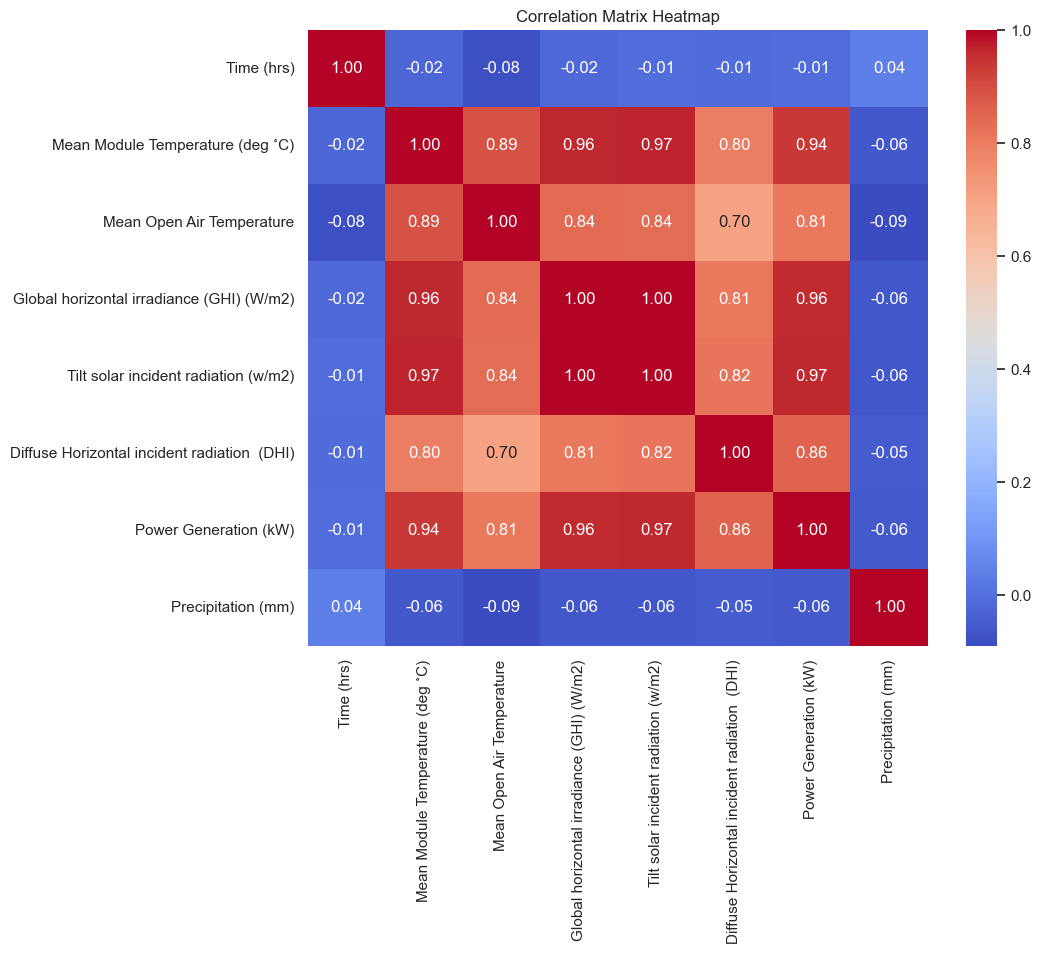

In [8]:
# Correlation matrix heatmap
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

The heatmap illustrates the following key points:

- There is a strong positive correlation between `Power Generation` and both `Global Horizontal Irradiance (GHI)` and `Tilt Solar Incident Radiation`, with correlation coefficients of 0.85 and 0.84, respectively. This confirms our observations from the scatter plots.
- `Diffuse Horizontal Incident Radiation (DHI)` also has a strong positive correlation with power generation, although it's slightly lower than GHI and tilt radiation.
- `Precipitation` has a very low negative correlation with power generation, suggesting that rainfall has minimal direct impact on the amount of power generated.
- `Mean Module Temperature` and `Mean Open Air Temperature` have moderate to low correlations with power generation, indicating they are less significant predictors in this context.

## Data Preprocessing

Given the strong correlations with our target variable, we'll focus on `GHI`, `tilt radiation`, and `DHI` as features for our Support Vector Regression model.

For preprocessing, we'll need to:

- Extract Date and Time components from the "Time (hrs)" column.
- Normalize the feature data because SVR is sensitive to the scale of the input data.
- Split the dataset into a training set and a test set for model validation.

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

In [10]:
# Extracting date and time components
data['Year'] = data['Time (hrs)'].dt.year
data['Month'] = data['Time (hrs)'].dt.month
data['Day'] = data['Time (hrs)'].dt.day
data['Hour'] = data['Time (hrs)'].dt.hour

# Dropping the original 'Time (hrs)' column as we have extracted the necessary components
data.drop('Time (hrs)', axis=1, inplace=True)

# Viewing the modified dataset
data.head()

,Mean Module Temperature (deg ˚C),Mean Open Air Temperature,Global horizontal irradiance (GHI) (W/m2),Tilt solar incident radiation (w/m2),Diffuse Horizontal incident radiation (DHI),Power Generation (kW),Precipitation (mm),Year,Month,Day,Hour
0,22.10,24.00,0.0,0.0,0.0,0.5,0.0,2013,1,1,1
1,22.15,24.20,0.0,0.0,0.0,0.0,0.0,2013,1,1,2
2,22.45,24.50,0.0,0.0,0.0,0.5,0.0,2013,1,1,3
3,22.84,24.50,0.0,0.0,0.0,0.5,0.5,2013,1,1,4
4,21.98,23.65,0.0,0.0,0.0,0.0,0.0,2013,1,1,5


In [11]:
# Defining the features (X) and the target variable (y)
X = data.drop('Power Generation (kW)', axis=1)
y = data['Power Generation (kW)']

In [12]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Define a range of hyperparameters for tuning
param_grid = {
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.01, 0.1, 0.2, 0.5],
    'svr__kernel': ['linear', 'rbf']
}

In [14]:
# Create SVR pipeline
pipeline = make_pipeline(StandardScaler(), SVR())

In [15]:
# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

In [16]:
# Predicting on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculating performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}, R^2 Score: {r2}")

Mean Squared Error: 1082.4362132378344, R^2 Score: 0.9538735118682717


The initial Support Vector Regression model, with default parameters, has a mean squared error (MSE) of approximately 1082.43 and an R^2 score of 0.9538 on the test set.

The R^2 score of 0.9538 indicates that the model explains about 95.38% of the variance in the test set. This is generally considered a very good score, as it's close to 1, which would be a perfect fit.

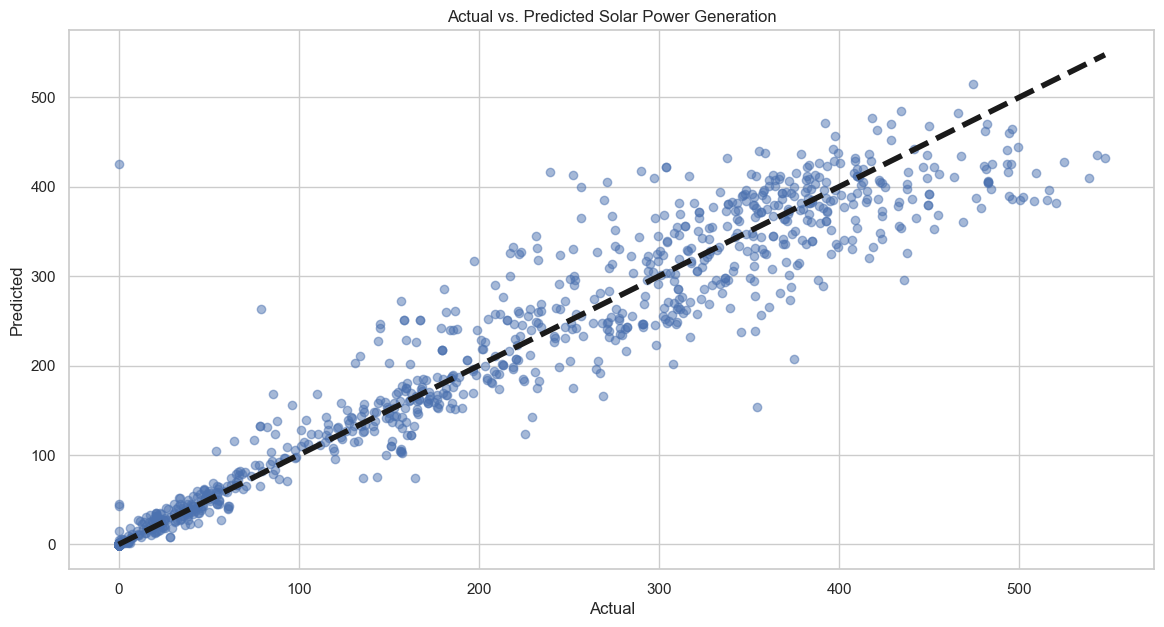

In [17]:
# Plotting actual vs predicted values
plt.figure(figsize=(14, 7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Solar Power Generation')
plt.show()

The plot shows a comparison of the actual vs. predicted solar power generation values. The closer the points are to the dashed line, which represents a perfect prediction, the more accurate the model's predictions are. Most points seem to lie close to the line, indicating a good fit.

### Export Model

In [18]:
import joblib

In [20]:
# Exporting the trained SVR model
model_filename = 'svr_model_new.pkl'
joblib.dump(best_model, model_filename)

model_filename

'svr_model_new.pkl'

### Prediction

**1. Manual**

Hypothetical set of input features:

- Mean Module Temperature (deg ˚C): 25.0
- Mean Open Air Temperature: 26.5
- Global horizontal irradiance (GHI) (W/m²): 450.0
- Tilt solar incident radiation (W/m²): 400.0
- Diffuse Horizontal incident radiation (DHI): 120.0
- Precipitation (mm): 0.0
- Year: 2023
- Month: 11
- Day: 10
- Hour: 12 (Noon)

In [29]:
import numpy as np

# Example feature data
example_data = np.array([[25.0, 26.5, 450.0, 400.0, 120.0, 0.0, 2023, 11, 10, 12]])

# Predicting the power generation using the trained model
predicted_power_generation = best_model.predict(example_data)
predicted_power_generation[0]

C:\Users\jatat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


189.06716934215024

**2. Test Set**

In [30]:
# Making predictions on a subset of the test set
test_data_subset = X_test.head(20)
actual_values = y_test.head(20)

In [31]:
# Predicting power generation
predicted_values = best_model.predict(test_data_subset)

# Replacing negative predictions with 0
predicted_values = np.where(predicted_values < 0, 0, predicted_values)

In [32]:
# Creating a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual Power Generation': actual_values, 
                              'Predicted Power Generation': predicted_values})

comparison_df.reset_index(drop=True, inplace=True)
comparison_df

,Actual Power Generation,Predicted Power Generation
0,277.5,253.533444
1,417.5,428.376949
2,173.0,166.268553
3,0.0,0.000000
4,151.5,137.422795
5,0.0,0.412571
6,0.0,0.000000
7,0.0,0.000000
8,34.0,52.321266
9,0.0,0.420828


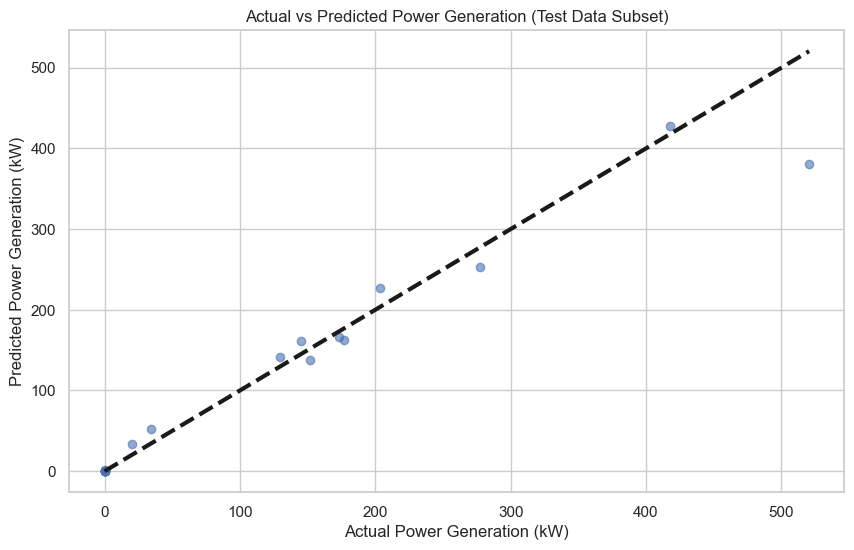

In [33]:
# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Actual Power Generation'], comparison_df['Predicted Power Generation'], alpha=0.6)
plt.plot([comparison_df['Actual Power Generation'].min(), comparison_df['Actual Power Generation'].max()], 
         [comparison_df['Actual Power Generation'].min(), comparison_df['Actual Power Generation'].max()], 
         'k--', lw=3)  # A reference line
plt.xlabel('Actual Power Generation (kW)')
plt.ylabel('Predicted Power Generation (kW)')
plt.title('Actual vs Predicted Power Generation (Test Data Subset)')
plt.show()